<a href="https://colab.research.google.com/github/BrilliantChard/Electricity-Demand-Prediction/blob/main/Electricity%20Demand%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/electricity demand.csv')
data.head()

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,01-Jan-20,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
1,01-Jan-20,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2,01-Jan-20,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
3,01-Jan-20,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
4,01-Jan-20,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    43848 non-null  object 
 1   hour         43837 non-null  float64
 2   dayofweek    43839 non-null  float64
 3   month        43840 non-null  float64
 4   year         43843 non-null  float64
 5   dayofyear    43843 non-null  float64
 6   Temperature  43841 non-null  float64
 7   Humidity     43838 non-null  float64
 8   Demand       43841 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.0+ MB


In [5]:
data.columns.to_list()

['Timestamp',
 'hour',
 'dayofweek',
 'month',
 'year',
 'dayofyear',
 'Temperature',
 'Humidity',
 'Demand']

In [6]:
data.isnull().sum()

,0
Timestamp,0
hour,11
dayofweek,9
month,8
year,5
dayofyear,5
Temperature,7
Humidity,10
Demand,7


### Converting the Timestamp column to datetime data type

In [7]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

/tmp/ipython-input-652119658.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Timestamp'] = pd.to_datetime(data['Timestamp'])


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    43848 non-null  datetime64[ns]
 1   hour         43837 non-null  float64       
 2   dayofweek    43839 non-null  float64       
 3   month        43840 non-null  float64       
 4   year         43843 non-null  float64       
 5   dayofyear    43843 non-null  float64       
 6   Temperature  43841 non-null  float64       
 7   Humidity     43838 non-null  float64       
 8   Demand       43841 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 3.0 MB


### Setting the Timestamp as the index of the DataFrame

In [9]:
data = data.set_index('Timestamp')
data.head()

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006


### Using the Describe function to check the summary statistics

In [10]:
data.describe()

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
count,43837.000000,43839.000000,43840.000000,43843.000000,43843.000000,43841.000000,43838.000000,43841.000000
mean,11.499030,2.999795,6.521282,2022.000068,183.208654,25.067788,59.903007,5000.790976
std,6.922006,2.000051,3.449168,1.415044,105.478826,12.821725,18.342604,1412.527409
min,0.000000,0.000000,1.000000,2020.000000,1.000000,3.000000,20.000000,1611.954020
25%,5.000000,1.000000,4.000000,2021.000000,92.000000,15.210186,46.241224,4015.668472
50%,11.000000,3.000000,7.000000,2022.000000,183.000000,25.003212,59.986720,5013.053367
75%,17.000000,5.000000,10.000000,2023.000000,275.000000,34.740971,73.796820,6000.803082
max,23.000000,6.000000,12.000000,2024.000000,366.000000,50.000000,95.000000,11910.705100


In [11]:
data[['hour', 'Temperature', 'Humidity', 'Demand']].describe()

,hour,Temperature,Humidity,Demand
count,43837.000000,43841.000000,43838.000000,43841.000000
mean,11.499030,25.067788,59.903007,5000.790976
std,6.922006,12.821725,18.342604,1412.527409
min,0.000000,3.000000,20.000000,1611.954020
25%,5.000000,15.210186,46.241224,4015.668472
50%,11.000000,25.003212,59.986720,5013.053367
75%,17.000000,34.740971,73.796820,6000.803082
max,23.000000,50.000000,95.000000,11910.705100


# Data Cleaning

### 1. Missing Values

In [12]:
data.isnull().sum()

,0
hour,11
dayofweek,9
month,8
year,5
dayofyear,5
Temperature,7
Humidity,10
Demand,7


### 2. Showing records that contain any null values

In [13]:
data[data.isna().any(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-04-30,NaN,3.0,4.0,2020.0,121.0,21.820261,41.353675,5393.127681
2020-07-21,NaN,1.0,7.0,2020.0,203.0,36.555833,62.779665,6248.349423
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-27,NaN,5.0,2.0,2021.0,58.0,24.001003,53.303268,4523.253789
2021-12-13,23.0,0.0,12.0,2021.0,NaN,3.000000,75.457130,3225.225822
2021-12-14,NaN,1.0,12.0,2021.0,348.0,5.061319,47.215825,2887.848612


### 3. Showing records that contain ALL null values

In [14]:
data[data.isna().all(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4. Dropping rows that contain all null values

In [15]:
data = data.dropna(how='all')

data[data.isnull().all(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,


In [16]:
data.isnull().sum()

,0
hour,7
dayofweek,5
month,4
year,1
dayofyear,1
Temperature,3
Humidity,6
Demand,3


### 5. Using Backward (bfill) and Forward fill (ffill) to fill the missing values

In [17]:
data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']] = data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']].ffill()

In [18]:
data[['Temperature', 'Humidity']] = data[['Temperature', 'Humidity']].bfill()

### 6. Using Interpolate method (interpolate()) to fill the Demand column missing values

In [19]:
data['Demand'] = data['Demand'].interpolate(method = 'time')

In [20]:
data.isnull().sum()

,0
hour,0
dayofweek,0
month,0
year,0
dayofyear,0
Temperature,0
Humidity,0
Demand,0


In [21]:
data.shape

(43844, 8)

# Feature Engineering

### 1. Create a Quarter (of year) column after the dayofyear column

In [22]:
data.insert(5, 'quarter', data.index.quarter)
data.head()

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,1,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,1,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,1,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,1,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,1,3.881208,90.582444,2472.453006


In [23]:
data

,hour,dayofweek,month,year,dayofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,
2020-01-01,0.0,2.0,1.0,2020.0,1.0,1,3.000000,61.288951,2457.119872
2020-01-01,1.0,2.0,1.0,2020.0,1.0,1,3.000000,52.873702,2269.904712
2020-01-01,2.0,2.0,1.0,2020.0,1.0,1,4.244482,36.341783,2215.640403
2020-01-01,3.0,2.0,1.0,2020.0,1.0,1,3.000000,72.629378,2174.232413
2020-01-01,4.0,2.0,1.0,2020.0,1.0,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
2024-12-31,19.0,1.0,12.0,2024.0,366.0,4,3.956838,43.287161,4689.693109
2024-12-31,20.0,1.0,12.0,2024.0,366.0,4,3.118824,51.705756,4331.249224
2024-12-31,21.0,1.0,12.0,2024.0,366.0,4,3.000000,40.565916,4015.979957


### 2. Converting datatype from float to integer

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43844 entries, 2020-01-01 to 2024-12-31
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         43844 non-null  float64
 1   dayofweek    43844 non-null  float64
 2   month        43844 non-null  float64
 3   year         43844 non-null  float64
 4   dayofyear    43844 non-null  float64
 5   quarter      43844 non-null  int32  
 6   Temperature  43844 non-null  float64
 7   Humidity     43844 non-null  float64
 8   Demand       43844 non-null  float64
dtypes: float64(8), int32(1)
memory usage: 3.2 MB


In [25]:
data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']] = data[['hour', 'dayofweek', 'month', 'year', 'dayofyear']].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43844 entries, 2020-01-01 to 2024-12-31
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         43844 non-null  int64  
 1   dayofweek    43844 non-null  int64  
 2   month        43844 non-null  int64  
 3   year         43844 non-null  int64  
 4   dayofyear    43844 non-null  int64  
 5   quarter      43844 non-null  int32  
 6   Temperature  43844 non-null  float64
 7   Humidity     43844 non-null  float64
 8   Demand       43844 non-null  float64
dtypes: float64(3), int32(1), int64(5)
memory usage: 3.2 MB


### 3. Create the Weekofyear column in the dataset

In [26]:
data.insert(5, 'weekofyear', data.index.isocalendar().week.astype(int))

In [27]:
data

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,1,4,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,1,4,3.000000,40.565916,4015.979957


In [28]:
data.query('weekofyear == 40')

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,
2020-09-28,0,0,9,2020,272,40,3,15.502303,88.230262,3498.638794
2020-09-28,1,0,9,2020,272,40,3,20.706375,80.335995,3432.219681
2020-09-28,2,0,9,2020,272,40,3,21.370047,95.000000,3296.374379
2020-09-28,3,0,9,2020,272,40,3,20.198906,78.285383,3376.425529
2020-09-28,4,0,9,2020,272,40,3,19.011962,88.280650,3265.198588
...,...,...,...,...,...,...,...,...,...,...
2024-10-06,19,6,10,2024,280,40,4,24.381638,84.730588,5614.095900
2024-10-06,20,6,10,2024,280,40,4,17.991660,67.287892,5055.717044
2024-10-06,21,6,10,2024,280,40,4,18.754193,73.237951,4761.453890


### 4. Create a new column to check the weekend

In [29]:
data.insert(5, 'isWeekend', data.index.dayofweek.isin([5, 6]))

data

,hour,dayofweek,month,year,dayofyear,isWeekend,weekofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,False,1,1,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,False,1,1,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,False,1,1,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,False,1,1,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,False,1,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,False,1,4,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,False,1,4,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,False,1,4,3.000000,40.565916,4015.979957


In [30]:
data

,hour,dayofweek,month,year,dayofyear,isWeekend,weekofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,False,1,1,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,False,1,1,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,False,1,1,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,False,1,1,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,False,1,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,False,1,4,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,False,1,4,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,False,1,4,3.000000,40.565916,4015.979957


In [31]:
data

,hour,dayofweek,month,year,dayofyear,isWeekend,weekofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,False,1,1,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,False,1,1,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,False,1,1,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,False,1,1,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,False,1,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,False,1,4,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,False,1,4,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,False,1,4,3.000000,40.565916,4015.979957


In [32]:
data['isWeekend'] = data['isWeekend'].astype(int)

In [33]:
data

,hour,dayofweek,month,year,dayofyear,isWeekend,weekofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,0,1,1,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,0,1,1,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,0,1,1,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,0,1,1,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,0,1,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,0,1,4,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,0,1,4,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,0,1,4,3.000000,40.565916,4015.979957


In [34]:
data.query('isWeekend == 1 and month == 12')

,hour,dayofweek,month,year,dayofyear,isWeekend,weekofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-12-05,0,5,12,2020,340,1,49,4,3.000000,64.439113,2265.892960
2020-12-05,1,5,12,2020,340,1,49,4,3.000000,77.945804,2282.013569
2020-12-05,2,5,12,2020,340,1,49,4,3.000000,74.241328,2054.600521
2020-12-05,3,5,12,2020,340,1,49,4,4.247157,85.178262,2020.535442
2020-12-05,4,5,12,2020,340,1,49,4,7.729655,70.047977,2134.243463
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-29,19,6,12,2024,364,1,52,4,7.077721,46.341323,4304.049396
2024-12-29,20,6,12,2024,364,1,52,4,3.000000,69.641621,4146.583958
2024-12-29,21,6,12,2024,364,1,52,4,3.723222,46.751731,3366.641206


### 5. Checking for Holidays

In [35]:
!pip install holidays

In [36]:
import holidays

ke_holidays = holidays.Kenya(years=2025)
print(ke_holidays)

{datetime.date(2025, 1, 1): "New Year's Day", datetime.date(2025, 4, 18): 'Good Friday', datetime.date(2025, 4, 21): 'Easter Monday', datetime.date(2025, 5, 1): 'Labor Day', datetime.date(2025, 6, 1): 'Madaraka Day', datetime.date(2025, 10, 10): 'Mazingira Day', datetime.date(2025, 10, 20): 'Mashujaa Day', datetime.date(2025, 12, 12): 'Jamhuri Day', datetime.date(2025, 12, 25): 'Christmas Day', datetime.date(2025, 12, 26): 'Boxing Day', datetime.date(2025, 3, 30): 'Eid-al-Fitr (estimated)', datetime.date(2025, 3, 31): 'Eid-al-Fitr (observed, estimated)', datetime.date(2025, 6, 2): 'Madaraka Day (observed)'}


In [37]:
data['Holiday'] = holidays.Kenya(years = data.year)
data

,hour,dayofweek,month,year,dayofyear,isWeekend,weekofyear,quarter,Temperature,Humidity,Demand,Holiday
Timestamp,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,0,1,1,3.000000,61.288951,2457.119872,New Year's Day
2020-01-01,1,2,1,2020,1,0,1,1,3.000000,52.873702,2269.904712,New Year's Day
2020-01-01,2,2,1,2020,1,0,1,1,4.244482,36.341783,2215.640403,New Year's Day
2020-01-01,3,2,1,2020,1,0,1,1,3.000000,72.629378,2174.232413,New Year's Day
2020-01-01,4,2,1,2020,1,0,1,1,3.881208,90.582444,2472.453006,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,0,1,4,3.956838,43.287161,4689.693109,NaN
2024-12-31,20,1,12,2024,366,0,1,4,3.118824,51.705756,4331.249224,NaN
2024-12-31,21,1,12,2024,366,0,1,4,3.000000,40.565916,4015.979957,NaN


In [38]:
data['Holiday'].value_counts()

,count
Holiday,
New Year's Day,120
Good Friday,120
Easter Monday,120
Labor Day,120
Eid-al-Fitr,120
Mashujaa Day,120
Madaraka Day,120
Christmas Day,120
Jamhuri Day,120


In [39]:
data = data.drop(['Holiday'], axis=1)
data

,hour,dayofweek,month,year,dayofyear,isWeekend,weekofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,0,1,1,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,0,1,1,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,0,1,1,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,0,1,1,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,0,1,1,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,0,1,4,3.956838,43.287161,4689.693109
2024-12-31,20,1,12,2024,366,0,1,4,3.118824,51.705756,4331.249224
2024-12-31,21,1,12,2024,366,0,1,4,3.000000,40.565916,4015.979957


# Lagged Features

### 1. Demand from same hour Yesterday, same hour last week

In [40]:
data['Demand_lag_24hrs'] = data['Demand'].shift(24)
data.head(50)

,hour,dayofweek,month,year,dayofyear,isWeekend,weekofyear,quarter,Temperature,Humidity,Demand,Demand_lag_24hrs
Timestamp,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,0,1,1,3.000000,61.288951,2457.119872,NaN
2020-01-01,1,2,1,2020,1,0,1,1,3.000000,52.873702,2269.904712,NaN
2020-01-01,2,2,1,2020,1,0,1,1,4.244482,36.341783,2215.640403,NaN
2020-01-01,3,2,1,2020,1,0,1,1,3.000000,72.629378,2174.232413,NaN
2020-01-01,4,2,1,2020,1,0,1,1,3.881208,90.582444,2472.453006,NaN
2020-01-01,5,2,1,2020,1,0,1,1,10.822571,67.753433,3104.845505,NaN
2020-01-01,6,2,1,2020,1,0,1,1,6.306673,94.912591,3759.476912,NaN
2020-01-01,7,2,1,2020,1,0,1,1,7.464640,74.456860,4114.486001,NaN
2020-01-01,8,2,1,2020,1,0,1,1,14.746876,66.725005,4575.159503,NaN


In [41]:
data['Demand_lag_168hrs'] = data['Demand'].shift(168)
data.head(50)

,hour,dayofweek,month,year,dayofyear,isWeekend,weekofyear,quarter,Temperature,Humidity,Demand,Demand_lag_24hrs,Demand_lag_168hrs
Timestamp,,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,0,1,1,3.000000,61.288951,2457.119872,NaN,NaN
2020-01-01,1,2,1,2020,1,0,1,1,3.000000,52.873702,2269.904712,NaN,NaN
2020-01-01,2,2,1,2020,1,0,1,1,4.244482,36.341783,2215.640403,NaN,NaN
2020-01-01,3,2,1,2020,1,0,1,1,3.000000,72.629378,2174.232413,NaN,NaN
2020-01-01,4,2,1,2020,1,0,1,1,3.881208,90.582444,2472.453006,NaN,NaN
2020-01-01,5,2,1,2020,1,0,1,1,10.822571,67.753433,3104.845505,NaN,NaN
2020-01-01,6,2,1,2020,1,0,1,1,6.306673,94.912591,3759.476912,NaN,NaN
2020-01-01,7,2,1,2020,1,0,1,1,7.464640,74.456860,4114.486001,NaN,NaN
2020-01-01,8,2,1,2020,1,0,1,1,14.746876,66.725005,4575.159503,NaN,NaN


In [42]:
data.iloc[160:200]

,hour,dayofweek,month,year,dayofyear,isWeekend,weekofyear,quarter,Temperature,Humidity,Demand,Demand_lag_24hrs,Demand_lag_168hrs
Timestamp,,,,,,,,,,,,,
2020-01-07,16,1,1,2020,7,0,2,1,14.016616,37.637752,4587.785143,4733.816549,NaN
2020-01-07,17,1,1,2020,7,0,2,1,6.736632,54.734906,4833.704288,4796.039663,NaN
2020-01-07,18,1,1,2020,7,0,2,1,17.782435,49.297649,5400.257796,4791.518998,NaN
2020-01-07,19,1,1,2020,7,0,2,1,3.000000,37.696671,4424.534926,4492.165854,NaN
2020-01-07,20,1,1,2020,7,0,2,1,7.116704,46.152197,4279.454320,4398.302015,NaN
2020-01-07,21,1,1,2020,7,0,2,1,5.158936,44.385460,3768.807077,3705.698515,NaN
2020-01-07,22,1,1,2020,7,0,2,1,3.000000,46.821530,2924.189540,3211.918549,NaN
2020-01-07,23,1,1,2020,7,0,2,1,3.000000,44.708096,2657.653050,2857.968639,NaN
2020-01-08,0,2,1,2020,8,0,2,1,3.000000,47.891592,2363.060115,2216.875986,2457.119872


# Rolling Mean and Standard Deviation

In [43]:
data['Demand_rolling_mean_24hr'] = data['Demand'].rolling(window=24).mean()
data

,hour,dayofweek,month,year,dayofyear,isWeekend,weekofyear,quarter,Temperature,Humidity,Demand,Demand_lag_24hrs,Demand_lag_168hrs,Demand_rolling_mean_24hr
Timestamp,,,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,0,1,1,3.000000,61.288951,2457.119872,NaN,NaN,NaN
2020-01-01,1,2,1,2020,1,0,1,1,3.000000,52.873702,2269.904712,NaN,NaN,NaN
2020-01-01,2,2,1,2020,1,0,1,1,4.244482,36.341783,2215.640403,NaN,NaN,NaN
2020-01-01,3,2,1,2020,1,0,1,1,3.000000,72.629378,2174.232413,NaN,NaN,NaN
2020-01-01,4,2,1,2020,1,0,1,1,3.881208,90.582444,2472.453006,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,0,1,4,3.956838,43.287161,4689.693109,5102.077310,5105.730509,4039.969992
2024-12-31,20,1,12,2024,366,0,1,4,3.118824,51.705756,4331.249224,4187.844204,4673.672173,4045.945201
2024-12-31,21,1,12,2024,366,0,1,4,3.000000,40.565916,4015.979957,3859.260701,3856.359014,4052.475170


In [44]:
data.head(27)

,hour,dayofweek,month,year,dayofyear,isWeekend,weekofyear,quarter,Temperature,Humidity,Demand,Demand_lag_24hrs,Demand_lag_168hrs,Demand_rolling_mean_24hr
Timestamp,,,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,0,1,1,3.000000,61.288951,2457.119872,NaN,NaN,NaN
2020-01-01,1,2,1,2020,1,0,1,1,3.000000,52.873702,2269.904712,NaN,NaN,NaN
2020-01-01,2,2,1,2020,1,0,1,1,4.244482,36.341783,2215.640403,NaN,NaN,NaN
2020-01-01,3,2,1,2020,1,0,1,1,3.000000,72.629378,2174.232413,NaN,NaN,NaN
2020-01-01,4,2,1,2020,1,0,1,1,3.881208,90.582444,2472.453006,NaN,NaN,NaN
2020-01-01,5,2,1,2020,1,0,1,1,10.822571,67.753433,3104.845505,NaN,NaN,NaN
2020-01-01,6,2,1,2020,1,0,1,1,6.306673,94.912591,3759.476912,NaN,NaN,NaN
2020-01-01,7,2,1,2020,1,0,1,1,7.464640,74.456860,4114.486001,NaN,NaN,NaN
2020-01-01,8,2,1,2020,1,0,1,1,14.746876,66.725005,4575.159503,NaN,NaN,NaN


In [45]:
data['Demand_rolling_std_24hr'] = data['Demand'].rolling(window=24).std()
data

,hour,dayofweek,month,year,dayofyear,isWeekend,weekofyear,quarter,Temperature,Humidity,Demand,Demand_lag_24hrs,Demand_lag_168hrs,Demand_rolling_mean_24hr,Demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,0,1,1,3.000000,61.288951,2457.119872,NaN,NaN,NaN,NaN
2020-01-01,1,2,1,2020,1,0,1,1,3.000000,52.873702,2269.904712,NaN,NaN,NaN,NaN
2020-01-01,2,2,1,2020,1,0,1,1,4.244482,36.341783,2215.640403,NaN,NaN,NaN,NaN
2020-01-01,3,2,1,2020,1,0,1,1,3.000000,72.629378,2174.232413,NaN,NaN,NaN,NaN
2020-01-01,4,2,1,2020,1,0,1,1,3.881208,90.582444,2472.453006,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,0,1,4,3.956838,43.287161,4689.693109,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,0,1,4,3.118824,51.705756,4331.249224,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,0,1,4,3.000000,40.565916,4015.979957,3859.260701,3856.359014,4052.475170,977.565114


## Dropping rows having null values

In [46]:
data.dropna(inplace=True)

In [47]:
data

,hour,dayofweek,month,year,dayofyear,isWeekend,weekofyear,quarter,Temperature,Humidity,Demand,Demand_lag_24hrs,Demand_lag_168hrs,Demand_rolling_mean_24hr,Demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,0,2,1,3.000000,47.891592,2363.060115,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,0,2,1,4.433666,61.209727,2282.558766,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,0,2,1,5.000529,63.868618,2193.324174,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,0,2,1,4.253477,44.603210,2208.724679,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,0,2,1,5.966044,85.921008,2402.611018,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,0,1,4,3.956838,43.287161,4689.693109,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,0,1,4,3.118824,51.705756,4331.249224,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,0,1,4,3.000000,40.565916,4015.979957,3859.260701,3856.359014,4052.475170,977.565114


# **VISUALIZATION**

### 1. Plotting Demand over Time


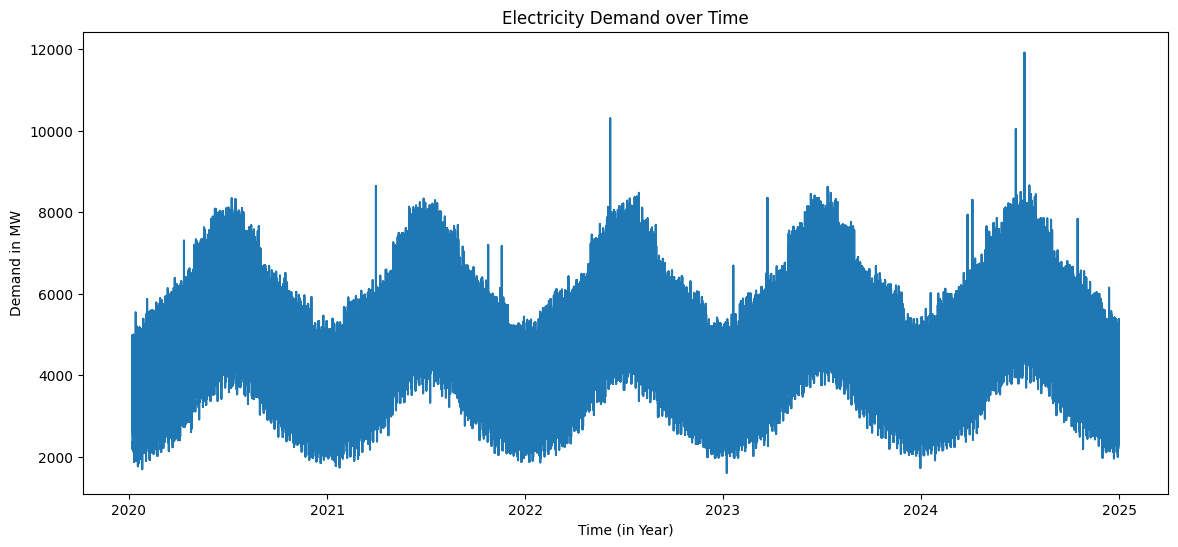

In [48]:
plt.figure(figsize=(14, 6))
plt.plot(data['Demand'])
plt.title("Electricity Demand over Time")
plt.xlabel("Time (in Year)")
plt.ylabel("Demand in MW")
plt.show()

### 2. Visualizing Demand by hour of day

In [49]:
data.columns.to_list()

['hour',
 'dayofweek',
 'month',
 'year',
 'dayofyear',
 'isWeekend',
 'weekofyear',
 'quarter',
 'Temperature',
 'Humidity',
 'Demand',
 'Demand_lag_24hrs',
 'Demand_lag_168hrs',
 'Demand_rolling_mean_24hr',
 'Demand_rolling_std_24hr']

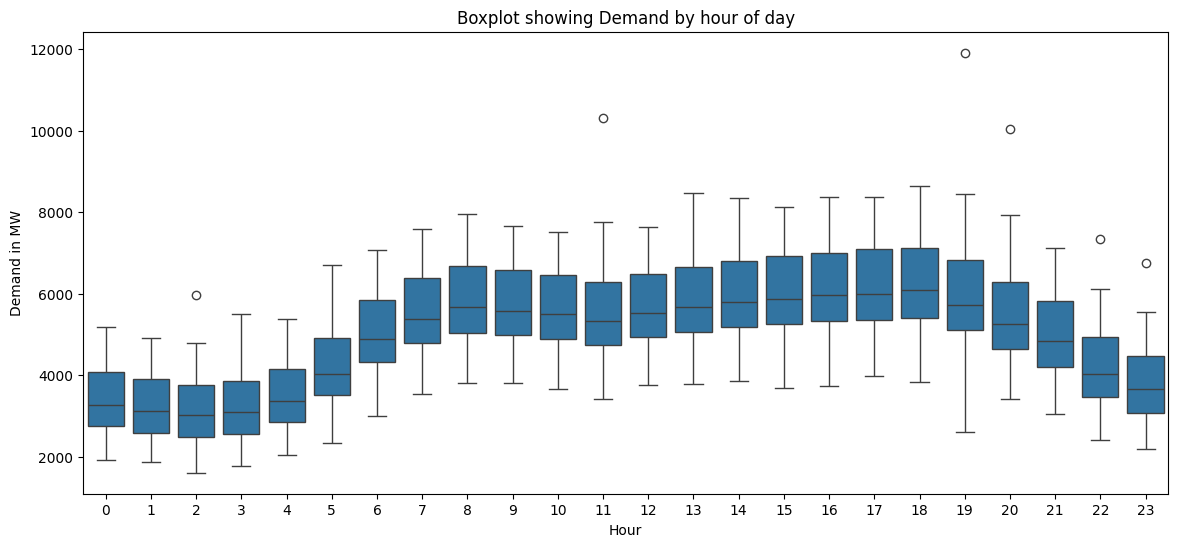

In [50]:
plt.figure(figsize = (14, 6))
sns.boxplot(data=data, x='hour', y='Demand')
plt.title('Boxplot showing Demand by hour of day')
plt.xlabel('Hour')
plt.ylabel('Demand in MW')
plt.show()

### 3. Visualize Demand by month

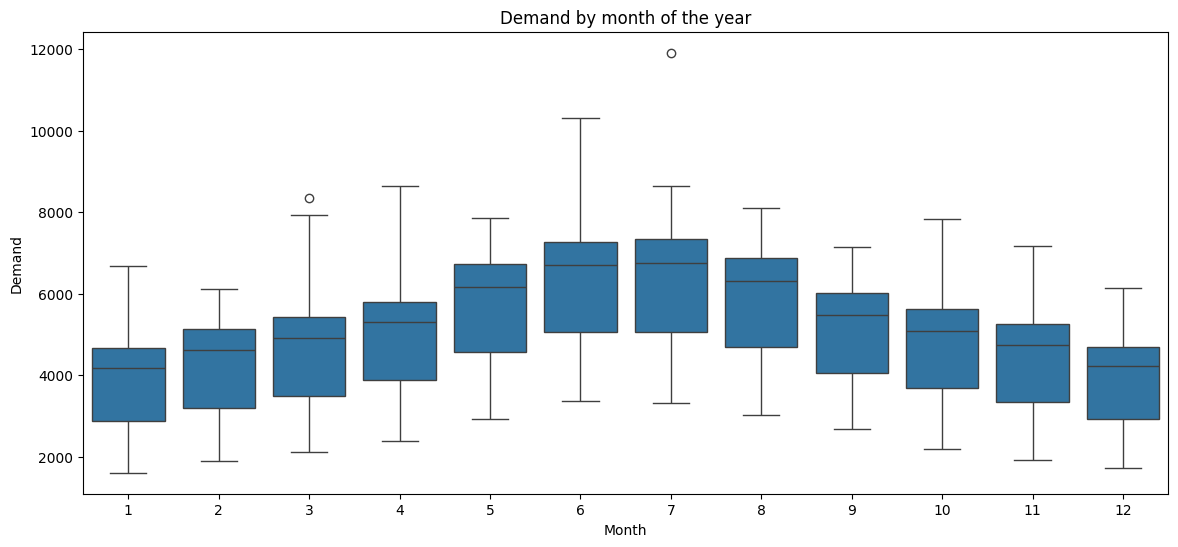

In [51]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x='month', y='Demand')
plt.title('Demand by month of the year')
plt.xlabel('Month');

### 4. Scatterplot of Demand vs Temperature

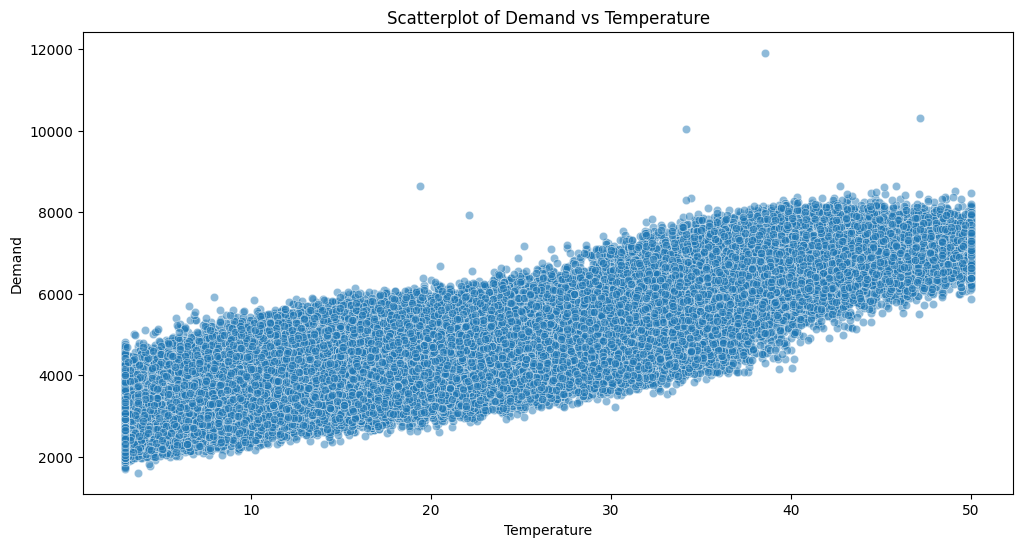

In [52]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Temperature', y='Demand', alpha=0.5)
plt.title("Scatterplot of Demand vs Temperature");

## Correlation Matrix

In [53]:
data.corr()

,hour,dayofweek,month,year,dayofyear,isWeekend,weekofyear,quarter,Temperature,Humidity,Demand,Demand_lag_24hrs,Demand_lag_168hrs,Demand_rolling_mean_24hr,Demand_rolling_std_24hr
hour,1.000000,-0.000115,0.000180,0.000102,0.000171,-0.000209,0.000178,0.000184,0.051951,-0.293458,0.396108,0.396089,0.396626,0.000259,0.006966
dayofweek,-0.000115,1.000000,0.001075,-0.001110,0.001074,0.790556,0.000205,0.002582,-0.000997,-0.002241,-0.127262,-0.000123,-0.127109,-0.096550,-0.039042
month,0.000180,0.001075,1.000000,-0.008866,0.996483,-0.001224,0.971869,0.971288,-0.014012,0.597453,0.030458,0.038615,0.085715,0.055706,-0.009372
year,0.000102,-0.001110,-0.008866,1.000000,-0.009407,0.000965,-0.020163,-0.007481,-0.005114,-0.000723,0.046514,0.046286,0.046426,0.074826,-0.000505
dayofyear,0.000171,0.001074,0.996483,-0.009407,1.000000,-0.001039,0.973509,0.968174,-0.016933,0.596751,0.028252,0.036424,0.083656,0.052175,-0.012346
isWeekend,-0.000209,0.790556,-0.001224,0.000965,-0.001039,1.000000,0.000236,0.001131,-0.001066,-0.001308,-0.160294,-0.047904,-0.160147,-0.162620,-0.144474
weekofyear,0.000178,0.000205,0.971869,-0.020163,0.973509,0.000236,1.000000,0.947413,-0.025676,0.596420,0.021414,0.028866,0.076468,0.040598,-0.023263
quarter,0.000184,0.002582,0.971288,-0.007481,0.968174,0.001131,0.947413,1.000000,-0.011304,0.614172,0.033047,0.041335,0.087875,0.059987,-0.004336
Temperature,0.051951,-0.000997,-0.014012,-0.005114,-0.016933,-0.001066,-0.025676,-0.011304,1.000000,0.001396,0.828245,0.804343,0.796094,0.772259,0.568798
Humidity,-0.293458,-0.002241,0.597453,-0.000723,0.596751,-0.001308,0.596420,0.614172,0.001396,1.000000,-0.066243,-0.077808,-0.031584,0.069116,0.002232


In [54]:
corr = data.corr()

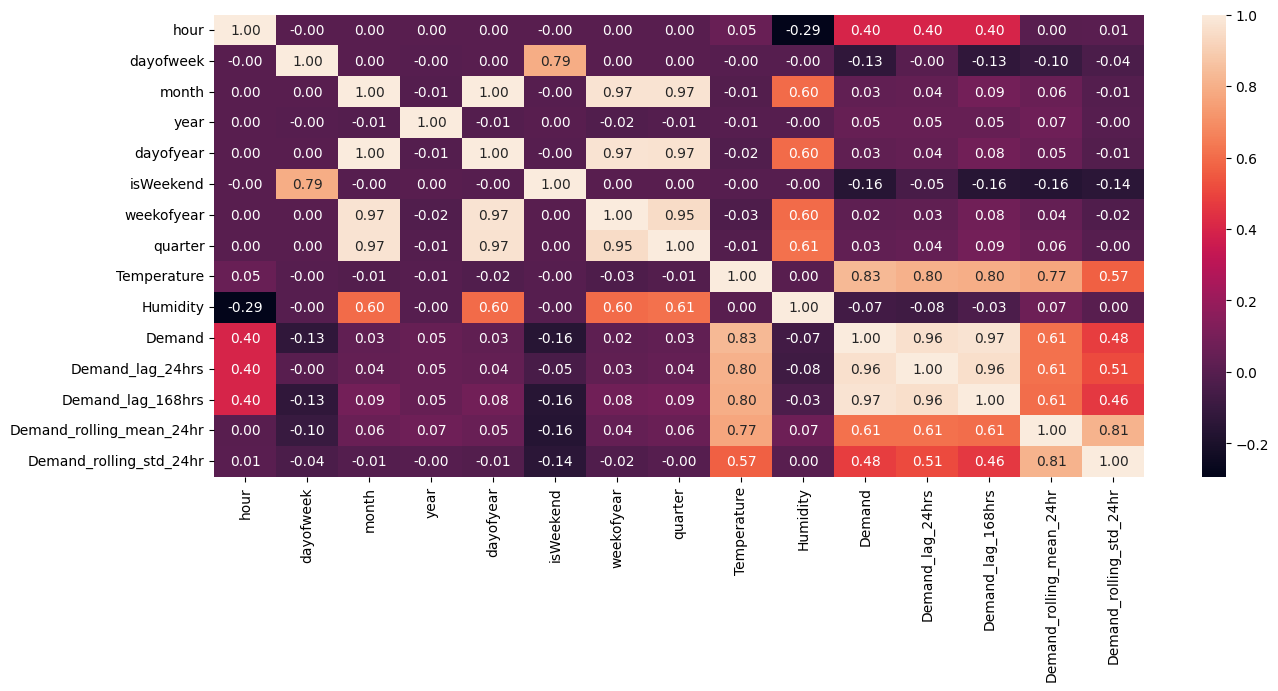

In [55]:
plt.figure(figsize=(15, 6))
sns.heatmap(corr, annot=True, fmt='.2f');

# **MODEL BUILDING**

In [56]:
Y = data['Demand']
X = data.drop('Demand', axis=1)

In [57]:
X

,hour,dayofweek,month,year,dayofyear,isWeekend,weekofyear,quarter,Temperature,Humidity,Demand_lag_24hrs,Demand_lag_168hrs,Demand_rolling_mean_24hr,Demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,0,2,1,3.000000,47.891592,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,0,2,1,4.433666,61.209727,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,0,2,1,5.000529,63.868618,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,0,2,1,4.253477,44.603210,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,0,2,1,5.966044,85.921008,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,0,1,4,3.956838,43.287161,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,0,1,4,3.118824,51.705756,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,0,1,4,3.000000,40.565916,3859.260701,3856.359014,4052.475170,977.565114


In [58]:
X_train = X.loc[: "2023-12-31"]
Y_train = Y.loc[: "2023-12-31"]

In [59]:
X.columns

Index(['hour', 'dayofweek', 'month', 'year', 'dayofyear', 'isWeekend',
       'weekofyear', 'quarter', 'Temperature', 'Humidity', 'Demand_lag_24hrs',
       'Demand_lag_168hrs', 'Demand_rolling_mean_24hr',
       'Demand_rolling_std_24hr'],
      dtype='object')

In [60]:
X_train.shape

(34892, 14)

In [61]:
Y_train.shape

(34892,)

In [62]:
X_test = X.loc['2024-01-01' :]
Y_test = Y.loc['2024-01-01' :]

In [63]:
X_test.shape

(8784, 14)

In [64]:
Y_test.shape

(8784,)

In [65]:
X_test

,hour,dayofweek,month,year,dayofyear,isWeekend,weekofyear,quarter,Temperature,Humidity,Demand_lag_24hrs,Demand_lag_168hrs,Demand_rolling_mean_24hr,Demand_rolling_std_24hr
Timestamp,,,,,,,,,,,,,,
2024-01-01,0,0,1,2024,1,0,1,1,3.000000,65.297046,2373.967493,2752.003113,3626.185642,856.204515
2024-01-01,1,0,1,2024,1,0,1,1,3.000000,69.068654,2328.972904,2419.747602,3640.380403,836.357296
2024-01-01,2,0,1,2024,1,0,1,1,3.000000,80.885372,1729.176090,2292.834087,3669.813854,776.458065
2024-01-01,3,0,1,2024,1,0,1,1,7.788675,66.501527,2257.337352,2507.704476,3685.801618,749.595470
2024-01-01,4,0,1,2024,1,0,1,1,6.607828,57.858109,2516.948873,2690.933257,3692.926651,738.736316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,0,1,4,3.956838,43.287161,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,0,1,4,3.118824,51.705756,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,0,1,4,3.000000,40.565916,3859.260701,3856.359014,4052.475170,977.565114


## XGBoost Model

In [67]:
from xgboost import XGBRegressor

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [69]:
from sklearn.model_selection import TimeSeriesSplit

### Initializing and training the model

In [72]:
model_xgb = XGBRegressor(
    n_estimators = 1000,
    early_stopping_rounds = 50,
    learning_rate = 0.01,
    random_state = 42,
    objective = 'reg:squarederror'
)

## In short:
### 1. The XGBRegressor initialization creates a model that will train for up to 1000 boosting rounds (trees) but will stop early if performance on a validation set doesn't improve for 50 consecutive rounds
### 2. Each tree's contribution is scaled down by a learning rate of 0.01 to prevent overfitting.
### 3. This model is designed to minimize the squared error for regression tasks.

In [74]:
model_xgb.fit(X_train, Y_train, eval_set = [(X_train, Y_train), (X_test, Y_test)], verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

### Making Predictions

In [75]:
prediction = model_xgb.predict(X_test)

### Evaluating the Model

In [76]:
rmse = np.sqrt(mean_squared_error(Y_test, prediction))

mae = mean_absolute_error(Y_test, prediction)

In [83]:
print(f"Model RMSE: {rmse:.2f} \nModel MAE: {mae:.2f}")

Model RMSE: 175.23 
Model MAE: 123.48


# **VISUALIZING OUTPUTS**

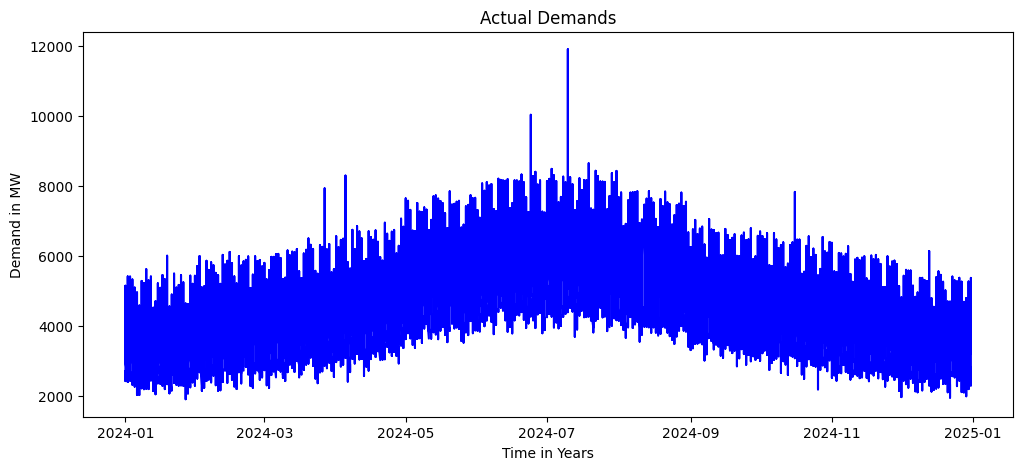

In [89]:
plt.figure(figsize = (12, 5))
plt.plot(Y_test.index, Y_test, color = 'Blue')
plt.title('Actual Demands')
plt.xlabel('Time in Years')
plt.ylabel('Demand in MW')
plt.show()

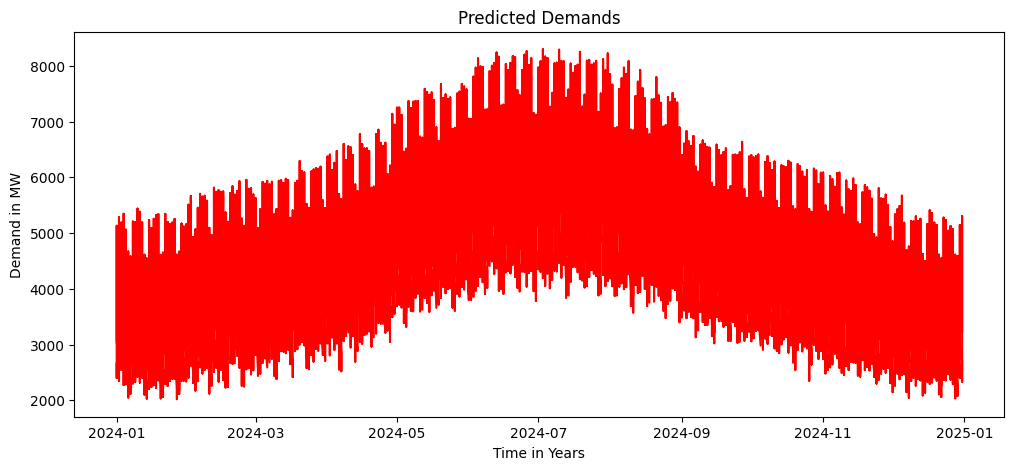

In [90]:
plt.figure(figsize = (12, 5))
plt.plot(Y_test.index, prediction, color = 'Red')
plt.title('Predicted Demands')
plt.xlabel('Time in Years')
plt.ylabel('Demand in MW')
plt.show()

In [91]:
import joblib

In [92]:
joblib.dump(model_xgb, 'Electricity_xgb_model_Prediction.pkl')

['Electricity_xgb_model_Prediction.pkl']